In [1]:
from __future__ import division

import scipy.integrate as integrate
import numpy as np
import math

from scipy.stats import norm

In [2]:
integrate.quad(lambda x: 1/(x**2), 1, np.inf)

(1.0, 1.1102230246251565e-14)

In [3]:
integrate.quad(lambda x: norm.pdf(x,loc=3,scale=2), -np.inf, np.inf)

(1.0000000000000007, 2.82704230849015e-09)

In [4]:
integrate.quad(lambda x: np.abs((58-x)/x)*norm.pdf(x,loc=60,scale=10), -np.inf, np.inf)

/Users/yutao/anaconda/lib/python2.7/site-packages/scipy/integrate/quadpack.py:352: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


(0.13933966421479385, 8.474144230774527e-08)

In [5]:
from scipy.optimize import minimize

In [6]:
def func(x_esti, loc, scale):
    return integrate.quad(lambda x: np.abs((x_esti-x)/x)*norm.pdf(x,loc=loc,scale=scale), -np.inf, np.inf)[0]

In [25]:
def minimize_convex(loc, scale):
    b, a = loc, 0
    while b-a > 1e-2:
        x = a + (b-a)/3
        y = a + 2*(b-a)/3
        #print x, y
        if func(x, loc, scale)>func(y, loc, scale):
            a = x
        else:
            b = y
    return a

In [26]:
minimize_convex(100, 19.53)

95.95045536437036

In [27]:
minimize_convex(50, 9.765)

47.73294956619003

In [11]:
np.linspace(20,200,37)

array([  20.,   25.,   30.,   35.,   40.,   45.,   50.,   55.,   60.,
         65.,   70.,   75.,   80.,   85.,   90.,   95.,  100.,  105.,
        110.,  115.,  120.,  125.,  130.,  135.,  140.,  145.,  150.,
        155.,  160.,  165.,  170.,  175.,  180.,  185.,  190.,  195.,  200.])

In [16]:
ss = []
for i in np.linspace(20, 200, 37):
    opt = minimize_convex(i, 0.216*i)
    print opt
    ss.append((i, opt))

19.0443425412
23.7626095841
28.6821240113
32.9473168235
38.0513972249
42.226091158
47.4892396566
51.9275950194
56.725358942
61.4994388307
66.5204590922
70.8074576691
75.9377446349
80.8961625285
85.2791609842
88.7995283466
95.0369088507
99.9610817821
104.542616769
109.744432425
113.939920302
118.002682932
123.171453769
128.450740185
131.941537609
137.243561491
142.31808517
145.488527277
151.10912457
156.533212277
160.722168612
163.946381202
170.950825732
175.420905454
178.60292031
184.914552196
188.987901635


In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

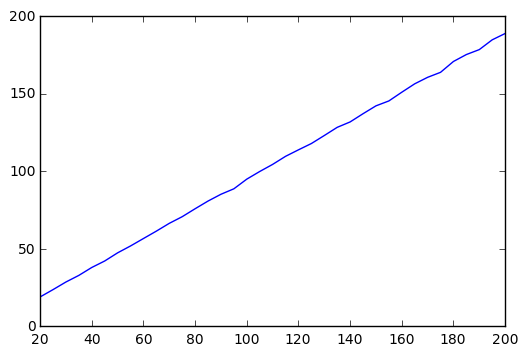

In [24]:
plt.plot([i[0] for i in ss], [i[1] for i in ss])

In [120]:
minimize(lambda x: func(x, 60, 20), 60, tol=1e-3)

   status: 2
  success: False
     njev: 33
     nfev: 110
 hess_inv: array([[1]])
      fun: 1.147828929531372
        x: array([ 60.])
  message: 'Desired error not necessarily achieved due to precision loss.'
      jac: array([ 0.01908605])
      nit: 0

In [86]:
?minimize

In [91]:
12*3*7

252